#ANN


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.iloc[: , 3:13]
y = dataset.iloc[:, -1]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Feature engineerng

geography = pd.get_dummies(X['Geography'], drop_first = True)

In [ ]:
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [ ]:
X = X.drop(['Geography','Gender'], axis = 1)

In [ ]:
 pd.concat([X,geography,gender],axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#X_test.reshape(-1,1)

In [ ]:
X_train.shape

(8000, 8)

In [ ]:
y_train.shape

(8000,)

#Part 2 ANN 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU, ELU , ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#lets initiate ANN

classifier = Sequential()

In [ ]:
##adding the input layers 

classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:
##adding the first hidden layer 

classifier.add(Dense(units = 7, activation = 'relu'))

In [ ]:
## adding the second hidden layer

classifier.add(Dense(units = 6, activation ='relu'))

In [ ]:
#adding the output layer 

classifier.add (Dense(1,activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer= 'adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

#classifier.compile(optimizer= opt , loss = 'binary_crossentropy' , metrics=['accuracy'])


#by default the learning rate is takes as 0.1 for adam. but if you need to speficy :

#import tensorflow
#opt = tensorflow.keras.optimizer.Adam(learning_rate = 0.01)
#and now replace 'adam ' with opt variable above

In [ ]:
model_history = classifier.fit(X_train,y_train, validation_split = 0.33,  batch_size = 10,epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3312 - accuracy: 0.8619 - val_loss: 0.3729 - val_accuracy: 0.8493
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3324 - accuracy: 0.8636 - val_loss: 0.3722 - val_accuracy: 0.8444
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8615 - val_loss: 0.3773 - val_accuracy: 0.8482
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.8614 - val_loss: 0.3721 - val_accuracy: 0.8474
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3324 - accuracy: 0.8627 - val_loss: 0.3700 - val_accuracy: 0.8440
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8643 - val_loss: 0.3744 - val_accuracy: 0.8455
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8615 - val_loss: 0.3749 - val_accuracy:

In [ ]:
#early stopping -when accuracy is not increasing :
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


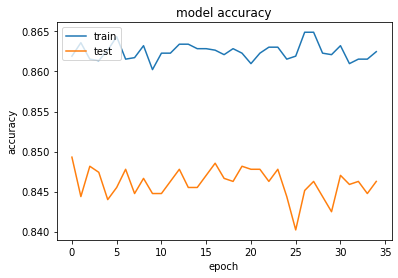

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

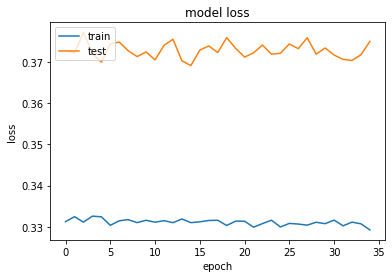

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1533,   62],
       [ 220,  185]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.859